C:\Users\naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 697s 883ms/step - accuracy: 0.7275 - loss: 0.5258 - val_accuracy: 0.8607 - val_loss: 0.3418
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 693s 886ms/step - accuracy: 0.8798 - loss: 0.2977 - val_accuracy: 0.8528 - val_loss: 0.3428
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 698s 892ms/step - accuracy: 0.9211 - loss: 0.2089 - val_accuracy: 0.8400 - val_loss: 0.3753
Test accuracy: 0.8399999737739563
Test loss: 0.3752628266811371


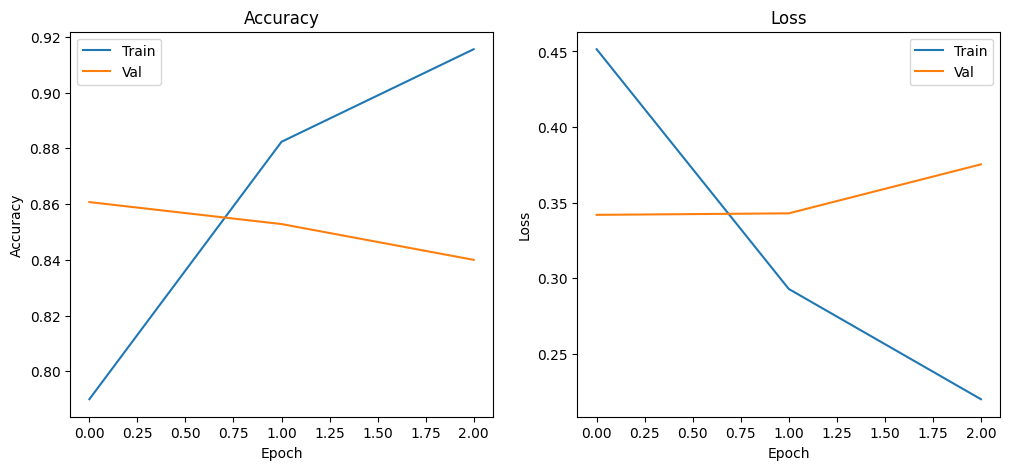

In [2]:
# ---------------------------------------------------------
# ASSIGNMENT 6: Sentiment Analysis using RNNs (LSTM/GRU)
#
# • Use IMDB dataset for sentiment analysis.
# • Build an RNN model using LSTM or GRU.
# • Visualize accuracy and loss curves.
# ---------------------------------------------------------

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# LOAD IMDB DATASET
# -----------------------------
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# -----------------------------
# PAD SEQUENCES (make same length)
# -----------------------------
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test  = sequence.pad_sequences(x_test, maxlen=max_len)

# -----------------------------
# BUILD SIMPLE LSTM MODEL
# -----------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 128, input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# -----------------------------
# COMPILE MODEL
# -----------------------------
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# TRAIN MODEL
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)

# -----------------------------
# EVALUATE MODEL
# -----------------------------
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", acc)
print("Test Loss:", loss)

# -----------------------------
# PLOT ACCURACY + LOSS
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()
